In [51]:
import Pkg; Pkg.activate(joinpath(@__DIR__,"..")); 
Pkg.instantiate()

using ForwardDiff
using LinearAlgebra
using Statistics
using Plots
plotlyjs()
using Printf
using Random
using DifferentialEquations

  Activating project at `/home/sman/Work/CMU/Courses/OCRL/OCRL-Walker-Project/juliaImplementation/juliaImplementation`


In [52]:
const FD = ForwardDiff;

PLOTS_DEFAULTS = Dict(:dpi => 600);

include("GeneralizedFunctionality/est_parameters.jl");
include("GeneralizedFunctionality/hybrid_system_simulation_tools.jl")
include("GeneralizedFunctionality/SKF_general.jl")
include("GeneralizedFunctionality/batch_estimation.jl")
include("GeneralizedFunctionality/generalized_saltation_calculations.jl")
# include("DynamicSystems/bouncing_ball.jl") # Defines hybrid system functions
include("DynamicSystems/biped5link.jl") # Defines hybrid system functions

#Falling ball system definition
dynamics = [biped_dynamics_5link]
resets = [[idReset]]
guards = [[idGuard]]

1-element Vector{Vector{typeof(idGuard)}}:
 [idGuard]

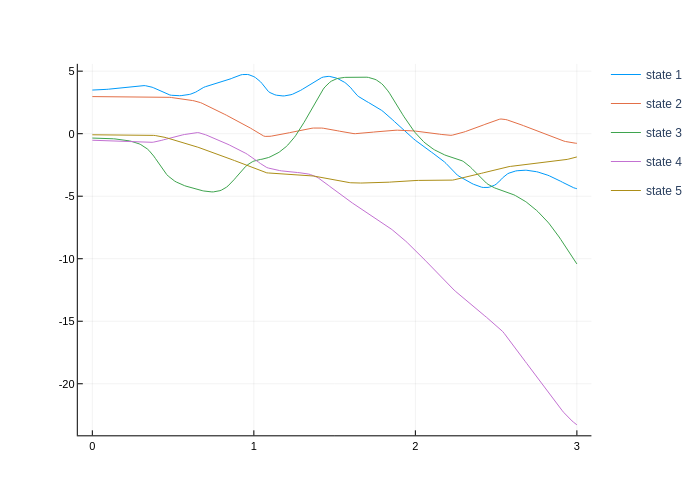

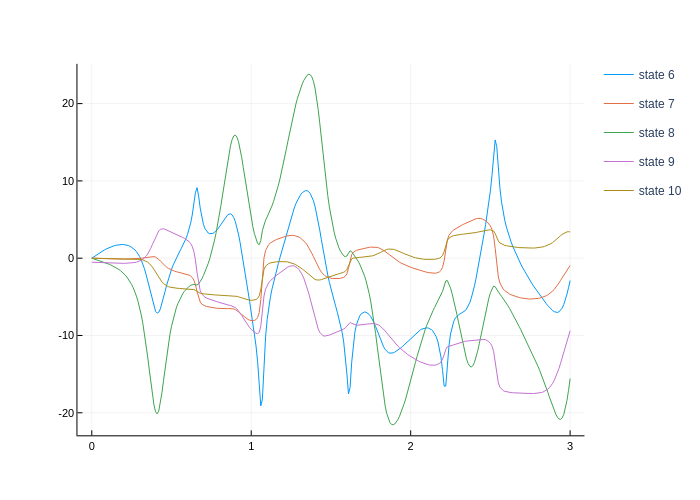

┌ Info: Saved animation to 
│   fn = /home/sman/Work/CMU/Courses/OCRL/OCRL-Walker-Project/juliaImplementation/juliaImplementation/src/walker2.gif
└ @ Plots /root/.julia/packages/Plots/NQpB8/src/animation.jl:114


Plots.AnimatedGif("/home/sman/Work/CMU/Courses/OCRL/OCRL-Walker-Project/juliaImplementation/juliaImplementation/src/walker2.gif")
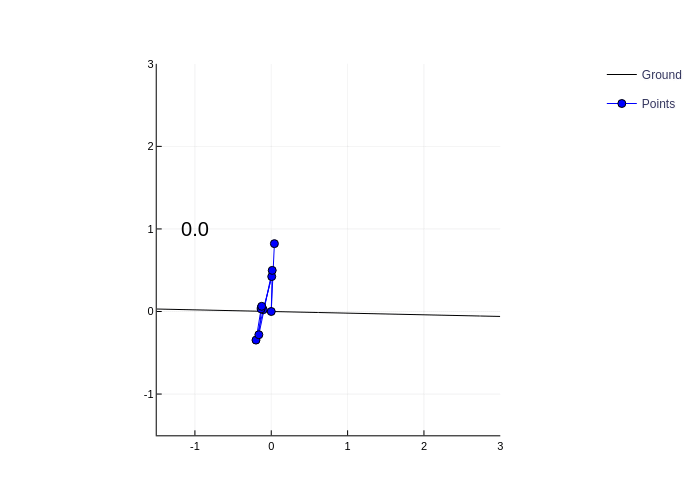

In [53]:
mode0 = 1
t = 3.0
dt = .01

q1 = 200 / 180 * π
q2 = 170 / 180 * π
q3 = -20 / 180 * π
d4 = -30 / 180 * π
q5 = -5 / 180 * π
qd1 = 0
qd2 = 0
qd3 = 0
qd4 = 0
qd5 = 0

x0 = [q1,q2,q3,d4,q5,qd1,qd2,qd3,d4,qd5]

p = (g=9.81, 
     L_torso=0.63, L_fem=0.4, L_tib=0.4,
     M_torso=12, M_fem=6.8, M_tib=3.2,
     MY_torso=0.24, MZ_torso=0.24, 
     MZ_fem=0.11, MZ_tib=0.24, 
     XX_torso=0.63, XX_fem=1.33, XX_tib=0.2)

#Nominal Trajectory
nom_states, _, times, nom_modes, nom_impact_states,_ = sim_system(x0,mode0,dynamics,resets,guards,0,0,0,t,dt)
state_matrix = hcat(nom_states...)

plot()
[plot!(times,state_matrix[i,:], label = "state $i") for i in 1:5]
display(plot!())

plot()
[plot!(times,state_matrix[i,:], label = "state $i") for i in 6:10]
display(plot!())

anim = Animation()
lim = 1.5

timesteps = size(state_matrix,2)
slope = 0.02

j1 = [0,0]
# Loop to create frames
for i in 1:timesteps

    if i > 1 && nom_modes[i] == 1 && nom_modes[i-1] == 2
        j1 = kinematics(state_matrix[:,i-1])[end]
    end

    js = hcat(kinematics(state_matrix[:,i])...)
    # Plot the data
    l_bound = -lim
    r_bound = 2*lim

    xs = l_bound:0.01:r_bound
    ys = -slope * xs
    plot(xs, ys, linestyle=:solid, label="Ground", color="black")
    plot!(js[1,:], js[2,:], xlim=(l_bound,r_bound),
                            ylim=(l_bound,r_bound), 
                            label="Points", 
                            color="blue", 
                            linestyle=:solid, 
                            marker=:circle, 
                            aspect_ratio=:equal)
    annotate!(-1, 1, times[i], color=:red)
    # Add frame to animation
    frame(anim)
end
# Save the animation as a gif
gif(anim, "walker2.gif", fps = 30)